1) ID number

2) Diagnosis (M = malignant, B = benign)

3-32)


Ten real-valued features are computed for each cell nucleus:

a) radius (média das distâncias do centro aos pontos no perímetro)

b) texture (desvio padrão dos valores de escala de cinza)

c) perimeter

d) area

e) smoothness (variação local nos comprimentos dos raios )

f) compactness (perímetro^2 / área - 1,0)

g) concavity (severidade das porções côncavas do contorno)

h) concave points (número de porções côncavas do contorno)

i) symmetry

j) fractal dimension (("aproximação da linha costeira" - 1)

# **Pré-análise**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
X = pd.read_csv("X.csv")

In [3]:
y = pd.read_csv("y.csv")

In [4]:
frames = [X, y]

In [5]:
df = pd.concat(frames, axis=1)
df.rename(columns={"0": "result"}, inplace=True)

In [6]:
df

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,result
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,186.0000,275.0000,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,243.0000,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,173.00000,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,198.00000,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,205.00000,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,111.00000,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,141.00000,0.21130,0.4107,0.2216,206.0000,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,144.00000,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,159.0000,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,277.00000,0.35140,152.00000,0.2397,0.07016,...,39.42,184.60,1821.0,165.00000,0.86810,0.9387,265.0000,0.4087,124.00000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0    radius_mean              569 non-null    float64
 1    texture_mean             569 non-null    float64
 2    perimeter_mean           569 non-null    float64
 3    area_mean                569 non-null    float64
 4    smoothness_mean          569 non-null    float64
 5    compactness_mean         569 non-null    float64
 6    concavity_mean           569 non-null    float64
 7   concave_points_mean       569 non-null    float64
 8    symmetry_mean            569 non-null    float64
 9    fractal_dimension_mean   569 non-null    float64
 10   radius_se                569 non-null    float64
 11   texture_se               569 non-null    float64
 12   perimeter_se             569 non-null    float64
 13   area_se                  569 non-null    float64
 14   smoothnes

In [8]:
df.isna().sum()

 radius_mean                0
 texture_mean               0
 perimeter_mean             0
 area_mean                  0
 smoothness_mean            0
 compactness_mean           0
 concavity_mean             0
concave_points_mean         0
 symmetry_mean              0
 fractal_dimension_mean     0
 radius_se                  0
 texture_se                 0
 perimeter_se               0
 area_se                    0
 smoothness_se              0
 compactness_se             0
 concavity_se               0
 concave_points_se          0
 symmetry_se                0
 fractal_dimension_se       0
 radius_worst               0
 texture_worst              0
 perimeter_worst            0
 area_worst                 0
 smoothness_worst           0
 compactness_worst          0
 concavity_worst            0
 concave_points_worst       0
 symmetry_worst             0
 fractal_dimension_worst    0
result                      0
dtype: int64

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,result
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,706.771388,19.289649,91.969033,654.889104,4.304801,4.835984,7.489124,2.366459,16.965766,0.851112,...,25.677223,107.261213,880.583128,10.633281,25.259112,26.723742,8.745685,30.367174,1.964313,0.627417
std,2430.243368,4.301036,24.298981,351.914129,21.074558,26.827478,35.618994,16.155145,53.846023,7.103493,...,6.146258,33.602542,569.356993,37.236433,96.473015,114.204035,39.465975,90.748044,14.464355,0.483918
min,7.760000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.116700,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,12.210000,16.170000,75.170000,420.300000,0.086410,0.065260,0.029580,0.020310,0.163400,0.057800,...,21.080000,84.110000,515.300000,0.117800,0.150700,0.116800,0.064990,0.254900,0.071460,0.000000
50%,13.850000,18.840000,86.240000,551.100000,0.095940,0.094620,0.063870,0.033900,0.181400,0.061660,...,25.410000,97.660000,686.500000,0.133800,0.227900,0.249200,0.101500,0.288400,0.080060,1.000000
75%,17.680000,21.800000,104.100000,782.700000,0.106100,0.132500,0.142500,0.077260,0.203600,0.066400,...,29.720000,125.400000,1084.000000,0.150000,0.384200,0.431600,0.170800,0.331800,0.092110,1.000000
max,9904.000000,39.280000,188.500000,2501.000000,123.000000,277.000000,313.000000,162.000000,304.000000,78.000000,...,49.540000,251.200000,4254.000000,185.000000,1058.000000,1252.000000,291.000000,544.000000,173.000000,1.000000


In [10]:
df.corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst,result
radius_mean,1.000000,-0.099840,-0.386753,-0.319166,0.029797,-0.050406,-0.002002,-0.041176,0.059780,-0.031360,...,-0.115969,-0.347007,-0.278298,0.024718,-0.017172,0.005269,-0.012441,-0.036770,-0.036936,0.218766
texture_mean,-0.099840,1.000000,0.329533,0.321086,0.033670,0.140073,0.054148,0.082132,-0.032590,-0.094817,...,0.912045,0.358040,0.343546,-0.005302,0.034215,0.031426,0.059725,-0.064752,0.019585,-0.415185
perimeter_mean,-0.386753,0.329533,1.000000,0.986507,0.105892,0.098709,0.155419,0.215696,-0.097831,-0.024489,...,0.303038,0.970387,0.941550,0.000419,0.023235,0.058499,0.185364,0.086627,0.027304,-0.742636
area_mean,-0.319166,0.321086,0.986507,1.000000,0.107286,0.076765,0.151664,0.215024,-0.096938,-0.028365,...,0.287489,0.959120,0.959213,-0.002280,0.010010,0.055673,0.183860,0.083427,0.008054,-0.708984
smoothness_mean,0.029797,0.033670,0.105892,0.107286,1.000000,-0.034976,0.014554,0.043158,0.001686,-0.022084,...,0.037551,0.125642,0.128621,0.016403,-0.051672,0.026080,0.030205,0.022975,-0.025747,-0.128880
compactness_mean,-0.050406,0.140073,0.098709,0.076765,-0.034976,1.000000,0.103352,0.178646,0.006421,-0.019556,...,0.129648,0.125386,0.088754,0.075275,-0.036373,0.063028,0.083746,0.039552,0.192826,-0.099244
concavity_mean,-0.002002,0.054148,0.155419,0.151664,0.014554,0.103352,1.000000,0.066535,-0.019557,-0.023116,...,0.051821,0.151919,0.144454,-0.008968,0.030513,0.256058,0.090931,-0.042144,-0.026531,-0.132225
concave_points_mean,-0.041176,0.082132,0.215696,0.215024,0.043158,0.178646,0.066535,1.000000,-0.044912,-0.016021,...,0.052106,0.203744,0.197594,0.072517,-0.036878,-0.032678,0.080438,-0.047359,0.123428,-0.141168
symmetry_mean,0.059780,-0.032590,-0.097831,-0.096938,0.001686,0.006421,-0.019557,-0.044912,1.000000,-0.034609,...,-0.050247,-0.100861,-0.100657,-0.046680,0.024209,0.083441,0.099551,-0.004926,-0.040480,0.077920
fractal_dimension_mean,-0.031360,-0.094817,-0.024489,-0.028365,-0.022084,-0.019556,-0.023116,-0.016021,-0.034609,1.000000,...,-0.100771,-0.040124,-0.043344,-0.031295,-0.028818,-0.001437,-0.024388,0.055950,-0.014295,0.045698


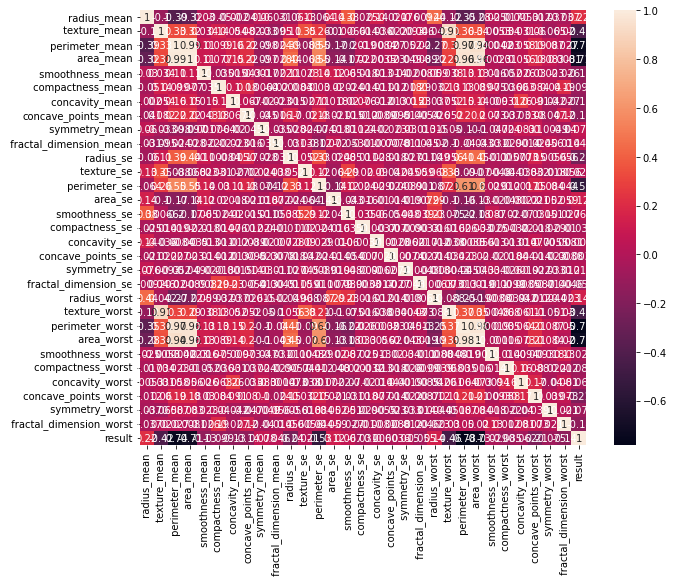

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)

In [12]:
sns.pairplot(df, hue="species");

KeyError: ignored

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fd1b9e86680> (for post_execute):


KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fd1b9e8d170> (for post_execute):


KeyboardInterrupt: ignored

# **Machine Learning models**

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

## **Black Box**

### **Logistic Regression:**

In [ ]:

X = df.drop(columns=["result"])
y = df["result"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20, stratify=y)

# ==========================================================
# ==========================================================
# o que eu vou fazer com as features numéricas

pipe_features_num = Pipeline([("std", StandardScaler())])

features_num = X_train.select_dtypes(include=np.number).columns.tolist()

# ==========================================================

pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num)])

# pipeline final
pipe_lr_bc = Pipeline([("pre_processador", pre_processador),
                    ("pca", PCA(n_components=2)),
                    ("lr", LogisticRegression(random_state=42))])

# ============================================

params_grid_lr_bc = {"lr__penalty": ["l1", "l2", "elasticnet"], 
                  "lr__C" : [0.1, 1, 10],
                  "lr__l1_ratio" : [0.1, 0.5, 0.9],
                  "lr__solver" : ["saga"]} 

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_lr_bc = GridSearchCV(estimator=pipe_lr_bc,
                       param_grid=params_grid_lr_bc,
                       scoring="f1_weighted",
                       cv=splitter,
                       verbose=10)

grid_lr_bc.fit(X_train, y_train)

In [21]:
grid_lr_bc.best_params_

{'lr__C': 1,
 'lr__l1_ratio': 0.5,
 'lr__penalty': 'elasticnet',
 'lr__solver': 'saga'}

In [18]:
lr_bc_results = pd.DataFrame(grid_lr_bc.cv_results_)
lr_bc_results.sort_values(by=["rank_test_score"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__l1_ratio,param_lr__penalty,param_lr__solver,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
14,0.013340,0.001004,0.005522,0.002333,1,0.5,elasticnet,saga,"{'lr__C': 1, 'lr__l1_ratio': 0.5, 'lr__penalty...",0.901042,...,0.922956,0.974814,0.974814,0.95,1.000000,0.843195,0.974136,0.931540,0.051083,1
26,0.016353,0.003456,0.005086,0.000440,10,0.9,elasticnet,saga,"{'lr__C': 10, 'lr__l1_ratio': 0.9, 'lr__penalt...",0.901042,...,0.922956,0.974814,0.974814,0.95,0.975148,0.870678,0.974136,0.929407,0.048627,2
24,0.014928,0.001163,0.004872,0.000430,10,0.9,l1,saga,"{'lr__C': 10, 'lr__l1_ratio': 0.9, 'lr__penalt...",0.901042,...,0.922956,0.974814,0.974814,0.95,0.975148,0.870678,0.974136,0.929407,0.048627,2
23,0.015096,0.001458,0.005008,0.000567,10,0.5,elasticnet,saga,"{'lr__C': 10, 'lr__l1_ratio': 0.5, 'lr__penalt...",0.901042,...,0.922956,0.974814,0.974814,0.95,0.975148,0.870678,0.974136,0.929407,0.048627,2
22,0.014606,0.002679,0.004645,0.000147,10,0.5,l2,saga,"{'lr__C': 10, 'lr__l1_ratio': 0.5, 'lr__penalt...",0.901042,...,0.922956,0.974814,0.974814,0.95,0.975148,0.870678,0.974136,0.929407,0.048627,2
21,0.016439,0.005760,0.005199,0.001651,10,0.5,l1,saga,"{'lr__C': 10, 'lr__l1_ratio': 0.5, 'lr__penalt...",0.901042,...,0.922956,0.974814,0.974814,0.95,0.975148,0.870678,0.974136,0.929407,0.048627,2
20,0.014320,0.000475,0.005451,0.001800,10,0.1,elasticnet,saga,"{'lr__C': 10, 'lr__l1_ratio': 0.1, 'lr__penalt...",0.901042,...,0.922956,0.974814,0.974814,0.95,0.975148,0.870678,0.974136,0.929407,0.048627,2
19,0.016486,0.005087,0.004639,0.000246,10,0.1,l2,saga,"{'lr__C': 10, 'lr__l1_ratio': 0.1, 'lr__penalt...",0.901042,...,0.922956,0.974814,0.974814,0.95,0.975148,0.870678,0.974136,0.929407,0.048627,2
18,0.016344,0.002604,0.004826,0.000421,10,0.1,l1,saga,"{'lr__C': 10, 'lr__l1_ratio': 0.1, 'lr__penalt...",0.901042,...,0.922956,0.974814,0.974814,0.95,0.975148,0.870678,0.974136,0.929407,0.048627,2
25,0.014532,0.001579,0.004793,0.000254,10,0.9,l2,saga,"{'lr__C': 10, 'lr__l1_ratio': 0.9, 'lr__penalt...",0.901042,...,0.922956,0.974814,0.974814,0.95,0.975148,0.870678,0.974136,0.929407,0.048627,2



Métricas de avaliação de treino:
[[130  18]
 [  9 241]]


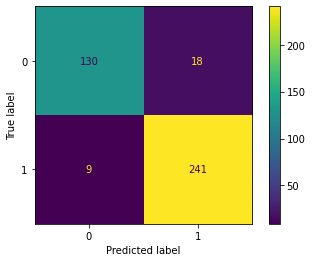

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       148
           1       0.93      0.96      0.95       250

    accuracy                           0.93       398
   macro avg       0.93      0.92      0.93       398
weighted avg       0.93      0.93      0.93       398


Métricas de avaliação de teste:
[[57  7]
 [ 8 99]]


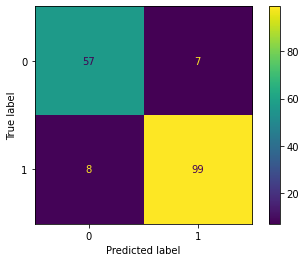

              precision    recall  f1-score   support

           0       0.88      0.89      0.88        64
           1       0.93      0.93      0.93       107

    accuracy                           0.91       171
   macro avg       0.91      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



In [22]:
### ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train_bc = grid_lr_bc.predict(X_train)

print(confusion_matrix(y_train, y_pred_train_bc))

#plot_confusion_matrix(grid_lr_pca, X_train, y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_bc)
plt.show()

print(classification_report(y_train, y_pred_train_bc))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test_bc = grid_lr_bc.predict(X_test)

print(confusion_matrix(y_test, y_pred_test_bc))

#plot_confusion_matrix(grid_lr_pca, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_bc)
plt.show()

print(classification_report(y_test, y_pred_test_bc))

**Probabilidade de saída do diagnóstico:**

In [23]:
resultado = df["result"].unique()
print(f"{resultado}")

[0 1]


In [24]:
probas = grid_lr_bc.predict_proba(X_test)
probas

array([[9.97985807e-01, 2.01419282e-03],
       [9.76289158e-01, 2.37108423e-02],
       [6.79135661e-04, 9.99320864e-01],
       [8.41379027e-05, 9.99915862e-01],
       [2.34833029e-01, 7.65166971e-01],
       [9.99193657e-01, 8.06343499e-04],
       [4.49713456e-02, 9.55028654e-01],
       [9.99894174e-01, 1.05826460e-04],
       [9.98668671e-01, 1.33132932e-03],
       [5.98306389e-01, 4.01693611e-01],
       [3.38630397e-04, 9.99661370e-01],
       [1.00000000e+00, 1.08335161e-10],
       [2.49115061e-02, 9.75088494e-01],
       [9.95470152e-01, 4.52984788e-03],
       [4.41473910e-03, 9.95585261e-01],
       [1.84722383e-02, 9.81527762e-01],
       [1.15178230e-01, 8.84821770e-01],
       [9.65978831e-03, 9.90340212e-01],
       [9.99995264e-01, 4.73640745e-06],
       [3.17013576e-02, 9.68298642e-01],
       [9.99665917e-01, 3.34083156e-04],
       [1.00000000e+00, 1.48712292e-10],
       [1.04201723e-01, 8.95798277e-01],
       [1.70786998e-03, 9.98292130e-01],
       [8.815437

**Tabela de comparação:**

In [25]:
tabela_bc = pd.DataFrame()

In [26]:
tabela_bc["Amostra existente"] = y_test

In [27]:
tabela_bc["Predição"] = y_pred_test_bc

In [28]:
tabela_bc

,Amostra existente,Predição
432,0,0
35,0,0
139,1,1
206,1,1
44,0,1
...,...,...
552,1,1
121,0,0
311,1,1
130,1,1


In [15]:
import pickle

In [29]:
with open("grid_lr_bc.pkl", "wb") as f:
    pickle.dump(grid_lr_bc, f)

In [16]:
with open("grid_lr_bc.pkl", "rb") as f:
    
    grid_lr_bc = pickle.load(f)

### **Intervalo de confiança do Logistic Regression - Vamos simular intervalos para amostras com 29 e 90 dados:**

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import norm
from scipy import stats
from scipy.stats import t

**Com 29 e 90 amostras**

In [31]:
resultados_logistica_cv_29 = []
resultados_logistica_cv_90 = []
for i in range(30):
  kfold = KFold(n_splits = 3, shuffle = True, random_state = i)
  
  logistica = LogisticRegression()
  scores = cross_val_score(logistica, X, y, cv = kfold)
  resultados_logistica_cv_90.append(scores)
  resultados_logistica_cv_29.append(scores.mean())

In [32]:
resultados_logistica_cv_29 = np.array(resultados_logistica_cv_29)
resultados_logistica_cv_90 = np.array(np.asarray(resultados_logistica_cv_90).reshape(-1))

**Para 29 amostras usamos o t-student:**

In [33]:
intervalos_logistica_t = t.interval(0.95, len(resultados_logistica_cv_29) - 1, 
                                    resultados_logistica_cv_29.mean(), 
                                    stats.sem(resultados_logistica_cv_29, ddof = 0))
intervalos_logistica_t

(0.9085974245668191, 0.9124935745358755)

**Variação do intervalo:**

In [34]:
abs(resultados_logistica_cv_29.mean() - intervalos_logistica_t[1])

0.001948074984528203

**Média do score:**

In [35]:
pd.DataFrame(resultados_logistica_cv_29).mean()[0]

0.9105454995513473

In [36]:
print(f"Temos 95% de confiança de que a média de acertos do Logistic Regression com 29 amostras está no intervalo entre {intervalos_logistica_t[0]*100:.2f}% e {intervalos_logistica_t[1]*100:.2f}%")

Temos 95% de confiança de que a média de acertos do Logistic Regression com 29 amostras está no intervalo entre 90.86% e 91.25%




---



**Para 90 amostras**

In [37]:
intervalos_logistica_n = norm.interval(0.95, resultados_logistica_cv_90.mean(), 
                                       stats.sem(resultados_logistica_cv_90))
intervalos_logistica_n

(0.9066726340086185, 0.9144183650940766)

**Para 90 amostras ele acabou aumentando a margem de erro em relação ao de 29 amostras, o que é esperado.**

**Variação do intervalo:**

In [38]:
abs(resultados_logistica_cv_90.mean() - intervalos_logistica_n[1])

0.0038728655427290315

**Média do score:**

In [39]:
resultado_90 = resultados_logistica_cv_90
resultado_90 = (resultado_90[0] + resultado_90[1] + resultado_90[2])/3
resultado_90

0.9156409542374454

In [40]:
print(f"Temos 95% de confiança de que a média de acertos do Logistic Regression com 90 amostras está no intervalo entre {intervalos_logistica_n[0]*100:.2f}% e {intervalos_logistica_n[1]*100:.2f}%")

Temos 95% de confiança de que a média de acertos do Logistic Regression com 90 amostras está no intervalo entre 90.67% e 91.44%


##**XGBOOST**

### **Black-Box**

In [64]:
from xgboost.sklearn import XGBClassifier
#Separando o que é features e target:
X = df.drop(columns=["result"])
y = df["result"]

# Dividindo em dados de teste e dados de treino, peguei 20% para dados de teste:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)


# Iniciando a construção da Pipeline:
# ==========================================================
#Primeiro vamos tratar as features numéricas. Tratando os valores nulos (NaN) e escalonando já que a variância entre as features é grande.
pipe_features_num = Pipeline([("input_num", SimpleImputer(strategy="mean")),
                              ("std", StandardScaler())])

# Pegando só as features numéricas
features_num = X_train.select_dtypes(include=np.number).columns.tolist()

# ==========================================================
# Pré-processador => Pegando as pipelines anteriores e unindo-as.
pre_processador = ColumnTransformer([("transf_num", pipe_features_num, features_num)])

# ==========================================================
# Pipeline final, usando o pré-processador e o estimador que queremos utilizar, neste caso o XGBoost para regressão.
pipe_xgbr = Pipeline([("pre_processador", pre_processador),
                      ("pca", PCA(n_components=2)),
                     ("xgbr", XGBClassifier(eval_metric='logloss', random_state=42))])


# ==========================================================
#Vamos dividir em splits para ter mais variedade no processamento dos dados.
splitter = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

#Montando a grade de parâmetros do estimador (XGBoost)
params_grid_xgbr = {"xgbr__n_estimators": [250, 600, 750, 1000, 2500, 10000],
                   "xgbr__max_depth": [2, 3, 5, 8],
                   "xgbr__learning_rate": [0.01, 0.001, 0.0001],
                   "xgbr__colsample_bytree": [0.5],
                   "xgbr__subsample": [0.5]}

#Motando a grade geral de parâmetros.
grid_xgbr = GridSearchCV(estimator=pipe_xgbr,
                       param_grid=params_grid_xgbr,
                       scoring="r2",
                       cv=splitter,
                       verbose=10,
                       n_jobs=-1)

grid_xgbr.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('pre_processador',
                                        ColumnTransformer(transformers=[('transf_num',
                                                                         Pipeline(steps=[('input_num',
                                                                                          SimpleImputer()),
                                                                                         ('std',
                                                                                          StandardScaler())]),
                                                                         [' '
                                                                          'radius_mean',
                                                                          ' '
                                                                          'texture_mean',
                        

In [60]:
grid_xgbr.best_params_

{'xgbr__colsample_bytree': 0.5,
 'xgbr__learning_rate': 0.01,
 'xgbr__max_depth': 2,
 'xgbr__n_estimators': 750,
 'xgbr__subsample': 0.5}

In [55]:
grid_xgbr_results = pd.DataFrame(grid_xgbr.cv_results_)
grid_xgbr_results.sort_values(by=["rank_test_score"])

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgbr__colsample_bytree,param_xgbr__learning_rate,param_xgbr__max_depth,param_xgbr__n_estimators,param_xgbr__subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
14,0.212643,0.007057,0.008698,0.000255,0.5,0.01,5,750,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.680000,0.466667,0.466667,0.782069,0.623810,0.603842,0.122962,1
21,0.280622,0.003774,0.009778,0.000207,0.5,0.01,8,1000,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.626667,0.466667,0.466667,0.727586,0.731293,0.603776,0.118077,2
35,2.123244,0.044148,0.053140,0.005194,0.5,0.001,3,10000,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.680000,0.466667,0.413333,0.782069,0.623810,0.593176,0.136019,3
9,0.230135,0.007303,0.008835,0.000178,0.5,0.01,3,1000,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.680000,0.466667,0.413333,0.782069,0.623810,0.593176,0.136019,3
34,0.542945,0.005204,0.015222,0.000141,0.5,0.001,3,2500,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.626667,0.520000,0.466667,0.782069,0.570068,0.593094,0.108347,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.262759,0.007258,0.009903,0.000982,0.5,0.0001,5,1000,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.360000,0.520000,0.520000,0.727586,0.570068,0.539531,0.117721,65
64,0.619081,0.017347,0.019943,0.002136,0.5,0.0001,5,2500,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.360000,0.520000,0.520000,0.727586,0.570068,0.539531,0.117721,65
60,0.076010,0.001037,0.006253,0.000221,0.5,0.0001,5,250,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.360000,0.520000,0.466667,0.727586,0.570068,0.528864,0.121368,70
42,0.085787,0.001583,0.006721,0.000206,0.5,0.001,8,250,0.5,"{'xgbr__colsample_bytree': 0.5, 'xgbr__learnin...",0.360000,0.466667,0.466667,0.673103,0.623810,0.518049,0.114444,71



Métricas de avaliação de treino:
[[131  19]
 [ 12 236]]


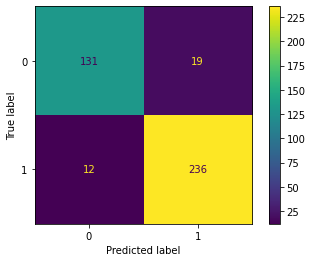

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       150
           1       0.93      0.95      0.94       248

    accuracy                           0.92       398
   macro avg       0.92      0.91      0.92       398
weighted avg       0.92      0.92      0.92       398


Métricas de avaliação de teste:
[[ 55   7]
 [  6 103]]


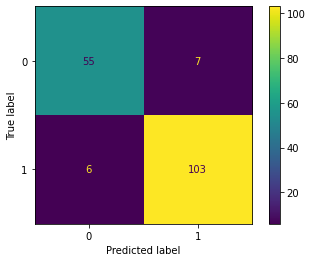

              precision    recall  f1-score   support

           0       0.90      0.89      0.89        62
           1       0.94      0.94      0.94       109

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [65]:
### ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train_xgbr = grid_xgbr.predict(X_train)

print(confusion_matrix(y_train, y_pred_train_xgbr))

#plot_confusion_matrix(grid_xgbr, X_train, y_train)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_xgbr)
plt.show()

print(classification_report(y_train, y_pred_train_xgbr))

# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test_xgbr = grid_xgbr.predict(X_test)

print(confusion_matrix(y_test, y_pred_test_xgbr))

#plot_confusion_matrix(grid_xgbr, X_test, y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test_xgbr)
plt.show()

print(classification_report(y_test, y_pred_test_xgbr))

**Probabilidade de sair determinada espécie:**

In [66]:
resultado_xgbr = df["result"].unique()
print(f"{resultado_xgbr}")

[0 1]


In [67]:
probas = grid_xgbr.predict_proba(X_test)
probas

array([[0.67836344, 0.3216366 ],
       [0.60611224, 0.39388776],
       [0.29287815, 0.70712185],
       [0.33009177, 0.6699082 ],
       [0.30465835, 0.69534165],
       [0.6796547 , 0.32034525],
       [0.2225756 , 0.7774244 ],
       [0.31021965, 0.68978035],
       [0.21935493, 0.7806451 ],
       [0.3118037 , 0.6881963 ],
       [0.31272554, 0.68727446],
       [0.67836344, 0.3216366 ],
       [0.3019787 , 0.6980213 ],
       [0.5674341 , 0.43256596],
       [0.6772721 , 0.3227279 ],
       [0.51230586, 0.48769417],
       [0.6644771 , 0.33552286],
       [0.68995535, 0.31004465],
       [0.3096056 , 0.6903944 ],
       [0.28381628, 0.7161837 ],
       [0.31330055, 0.68669945],
       [0.30773634, 0.69226366],
       [0.6649736 , 0.33502638],
       [0.67174274, 0.32825726],
       [0.31413466, 0.68586534],
       [0.4796008 , 0.5203992 ],
       [0.31823003, 0.68176997],
       [0.3089826 , 0.6910174 ],
       [0.3152123 , 0.6847877 ],
       [0.31005514, 0.68994486],
       [0.

In [68]:
tabela_iris_xgbr = pd.DataFrame()

In [69]:
tabela_iris_xgbr["Amostra existente"] = y_test

In [70]:
tabela_iris_xgbr["Predição"] = y_pred_test_xgbr

In [71]:
tabela_iris_xgbr

,Amostra existente,Predição
197,0,0
351,0,0
338,1,1
47,0,1
474,1,1
...,...,...
433,0,0
217,1,1
401,1,1
334,1,1


In [46]:
import pickle

In [72]:
with open("grid_xgbr.pkl", "wb") as f:
    pickle.dump(grid_xgbr, f)

In [47]:
with open("grid_xgbr.pkl", "rb") as f:
    
    grid_xgbr = pickle.load(f)

### **Intervalo de confiança do XGBoost - Vamos simular intervalos para amostras com 29 e 90 dados:**

In [160]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from scipy.stats import norm
from scipy import stats
from scipy.stats import t

**Com 29 e 90 amostras**

In [161]:
xgboost_cv_29 = []
xgboost_cv_90 = []
for i in range(30):
  kfold = KFold(n_splits = 3, shuffle = True, random_state = i)
  
  xgboost = XGBClassifier()
  scores = cross_val_score(xgboost, X, y, cv = kfold)
  xgboost_cv_90.append(scores)
  xgboost_cv_29.append(scores.mean())

In [162]:
xgboost_cv_29 = np.array(xgboost_cv_29)
xgboost_cv_90 = np.array(np.asarray(xgboost_cv_90).reshape(-1))

**Para 29 amostras usamos o t-student:**

In [163]:
intervalos_xgboost_t = t.interval(0.95, len(xgboost_cv_29) - 1, 
                                    xgboost_cv_29.mean(), 
                                    stats.sem(xgboost_cv_29, ddof = 0))
intervalos_xgboost_t

(0.9575144906365187, 0.9609310058206735)

**Variação do intervalo:**

In [168]:
abs(xgboost_cv_29.mean() - intervalos_xgboost_t[1])

0.001708257592077378

**Média do score:**

In [164]:
pd.DataFrame(xgboost_cv_29).mean()[0]

0.9592227482285961

In [165]:
print(f"Temos 95% de confiança de que a média de acertos do Logistic Regression com 29 amostras está no intervalo entre {intervalos_xgboost_t[0]*100:.2f}% e {intervalos_xgboost_t[1]*100:.2f}%")

Temos 95% de confiança de que a média de acertos do Logistic Regression com 29 amostras está no intervalo entre 95.75% e 96.09%




---



**Para 90 amostras**

In [166]:
intervalos_xgboost_n = norm.interval(0.95, xgboost_cv_90.mean(), 
                                       stats.sem(xgboost_cv_90))
intervalos_xgboost_n

(0.9563977195527009, 0.9620477769044915)

**Para 90 amostras ele acabou aumentando a margem de erro em relação ao de 29 amostras, o que é esperado.**

**Variação do intervalo:**

In [167]:
abs(xgboost_cv_90.mean() - intervalos_xgboost_n[1])

0.0028250286758952914

**Média do score:**

In [169]:
resultado_90 = xgboost_cv_90
resultado_90 = (resultado_90[0] + resultado_90[1] + resultado_90[2])/3
resultado_90

0.9613478139793931

In [170]:
print(f"Temos 95% de confiança de que a média de acertos do XGBoost Classifier com 90 amostras está no intervalo entre {intervalos_xgboost_n[0]*100:.2f}% e {intervalos_xgboost_n[1]*100:.2f}%")

Temos 95% de confiança de que a média de acertos do XGBoost Classifier com 90 amostras está no intervalo entre 95.64% e 96.20%


# **INTERPRETABILIDADE DO MODELO - POR AMOSTRA**

**Usaremos a Regressão Logística para a interpretabilidade...**

In [171]:
X = pd.read_csv("X.csv")
y = pd.read_csv("y.csv")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [172]:
lr = LogisticRegression().fit(X_train, y_train)

In [ ]:
!pip install lime
from lime import lime_tabular

In [174]:
lr.feature_names_in_

array([' radius_mean', ' texture_mean', ' perimeter_mean', ' area_mean',
       ' smoothness_mean', ' compactness_mean', ' concavity_mean',
       'concave_points_mean', ' symmetry_mean', ' fractal_dimension_mean',
       ' radius_se', ' texture_se', ' perimeter_se', ' area_se',
       ' smoothness_se', ' compactness_se', ' concavity_se',
       ' concave_points_se', ' symmetry_se', ' fractal_dimension_se',
       ' radius_worst', ' texture_worst', ' perimeter_worst',
       ' area_worst', ' smoothness_worst', ' compactness_worst',
       ' concavity_worst', ' concave_points_worst', ' symmetry_worst',
       ' fractal_dimension_worst'], dtype=object)

In [176]:
explainer = lime_tabular.LimeTabularExplainer(X_train.values,
                                              mode="classification",
                                              feature_names=lr.feature_names_in_,
                                              class_names=df["result"])

**Pegaremos a primeira amostra e ver o quanto as features interferiram no resultado:**

In [178]:
df["result"][0]

0

In [179]:
X_test.iloc[[0]]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
256,19.55,28.77,133.6,1207.0,0.0926,0.2063,0.1784,0.1144,0.1893,0.06232,...,25.05,36.27,178.6,1926.0,0.1281,0.5329,0.4251,0.1941,0.2818,0.1005


In [180]:
explainer = lime_tabular.LimeTabularExplainer(X_train.values,
                                              mode="classification",
                                              feature_names=lr.feature_names_in_,
                                              class_names=lr.classes_)

In [181]:
explanation = explainer.explain_instance(X_test.iloc[0],
                                         lr.predict_proba,
                                         num_features=lr.n_features_in_)
explanation.show_in_notebook()

#**INTERPRETABILIDADE DO MODELO GLOBALMENTE**

In [73]:
X = pd.read_csv("X.csv")
y = pd.read_csv("y.csv")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [74]:
lr_shap = LogisticRegression().fit(X_train, y_train)

In [ ]:
!pip install shap
import shap

In [76]:
explainer = shap.Explainer(lr_shap, X_train)

In [77]:
shap_vals = explainer.shap_values(X_train)

shap_vals

array([[-3.65250864e+01,  1.19320553e-01, -4.40803221e+00, ...,
         2.13896163e-01,  3.17823357e-02,  8.05478632e-02],
       [-3.58986872e+01, -6.84669292e-04,  5.30024703e+00, ...,
         2.10650604e-01,  3.17491592e-02,  7.98666749e-02],
       [-3.65034864e+01,  1.64463583e-01, -4.09902289e+00, ...,
         2.14295547e-01, -2.24112778e-01,  8.17923420e-02],
       ...,
       [-3.61985456e+01, -1.66585306e-01,  1.04782511e+00, ...,
         2.10667378e-01,  3.17509551e-02,  7.72517580e-02],
       [-3.60975340e+01,  1.66201590e-02,  2.40860012e+00, ...,
         2.10029974e-01,  3.17418812e-02,  7.88731072e-02],
       [-3.64895099e+01,  1.46782563e-01, -3.68512049e+00, ...,
         2.12959348e-01,  3.17917876e-02, -1.07948873e+01]])

In [78]:
resultado = df["result"].unique()
print(f"{resultado}")

[0 1]


**Features que mais impactaram na escolha do diagnóstico durante a geração do predict:**

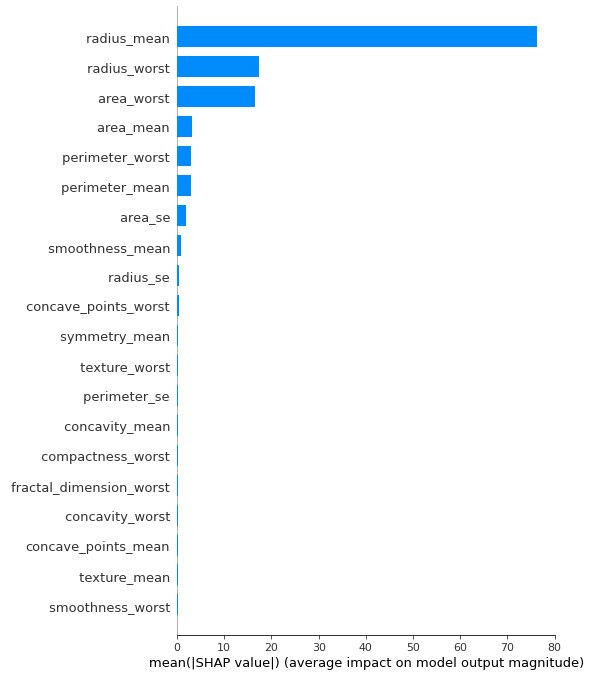

In [79]:
shap.summary_plot(shap_vals, X_train, plot_type="bar")